In [1]:
require_relative '../lib/tree/red_black'

def graph_red_black_tree(rbt, filename, title)
  count = {}
  instance = {}

  rbt.each { |node| count[node.key] ||= 0; count[node.key] += 1 }

  File.open(filename, 'w') do |file|
    file.write "graph \"\"\n{\n  label=\"#{title}\"\n"

    i = 0
    rbt.in_order do |node|
      parent = if count[node.key] > 1

                 # left child...
                 if node == node.parent&.left

                   # so increment node.key instance index.
                   instance[node.key] ||= -1
                   instance[node.key] += 1
                   instance[node] = instance[node.key]
                 end
                 "#{node.key}_#{instance[node]}"
               else
                 node.key
               end

      left_child = if node.left
                     if  count[node.left.key] > 1
                       "#{node.left.key}_#{instance[node.left]}"
                     else
                       node.left.key
                     end
                   else
                     'NIL' + (i += 1).to_s
                   end

      right_child = if node.right

                      # right child...
                      if  count[node.right.key] > 1

                        # so increment node.right.key instance index.
                        instance[node.right.key] ||= -1
                        instance[node.right.key] += 1
                        instance[node.right] = instance[node.right.key]
                        "#{node.right.key}_#{instance[node.right]}"
                      else
                        node.right.key
                      end
                    else
                      'NIL' + (i += 1).to_s
                    end

      file.write("  \"#{parent}\" [style=filled,color=#{node.color.to_s.downcase},fontcolor=white,label=#{node.key}];\n")
      file.write("  \"#{parent}\" -- \"#{left_child}\";\n")
      file.write("  \"#{parent}\" -- \"#{right_child}\";\n")
    end

    i.times do |n|
      file.write("  NIL#{n + 1} [fontsize=6,shape=box,width=0.2,height=0.2,style=filled,color=black,fontcolor=white,label=\"NIL\"];\n")
    end

    file.write("}\n")
  end
end



:graph_red_black_tree

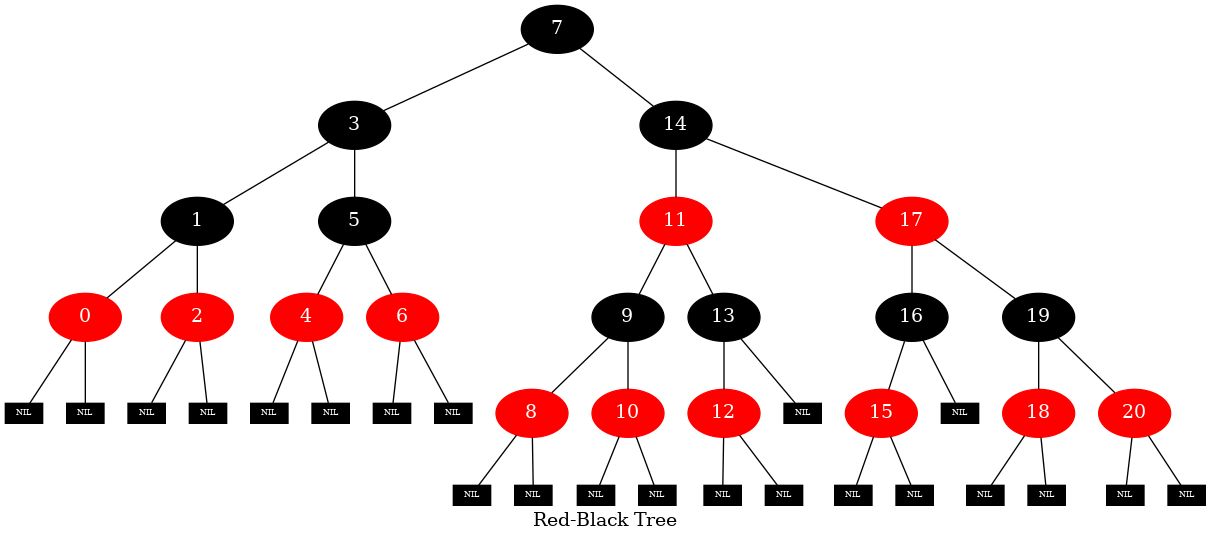

In [2]:
values = [*0..20].shuffle
rbt = Tree::RedBlack.new(true)
rbt.insert(*values)
graph_red_black_tree(rbt, 'dot.txt', 'Red-Black Tree')
system "dot -Tpng -o dot.png dot.txt"
File.open('dot.png')

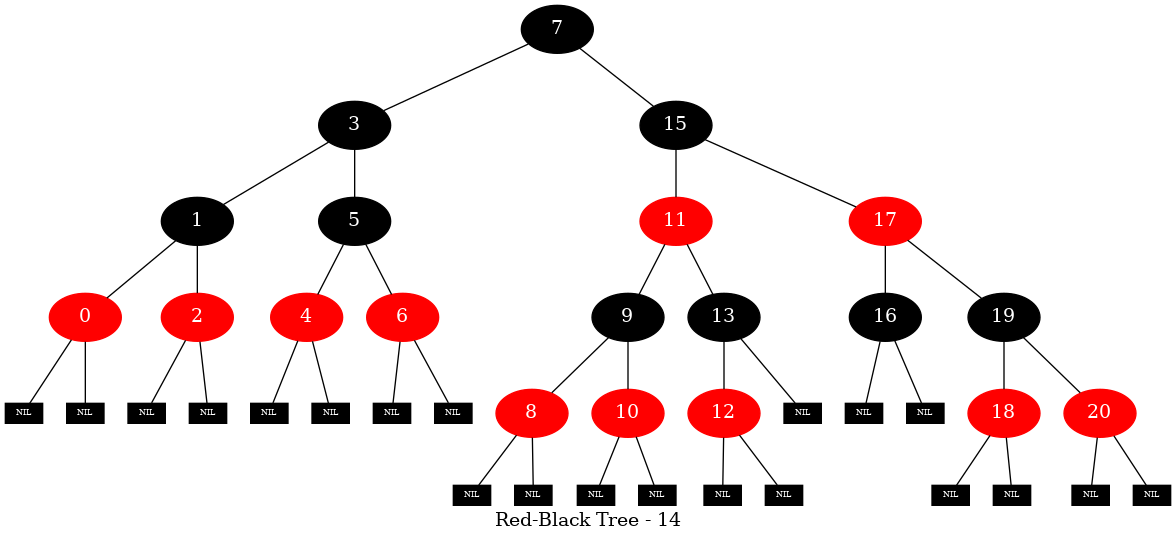

In [3]:
value = 14
rbt.delete(value)
graph_red_black_tree(rbt, 'dot2.txt', "Red-Black Tree - #{value}")
system "dot -Tpng -o dot2.png dot2.txt"
File.open('dot2.png')

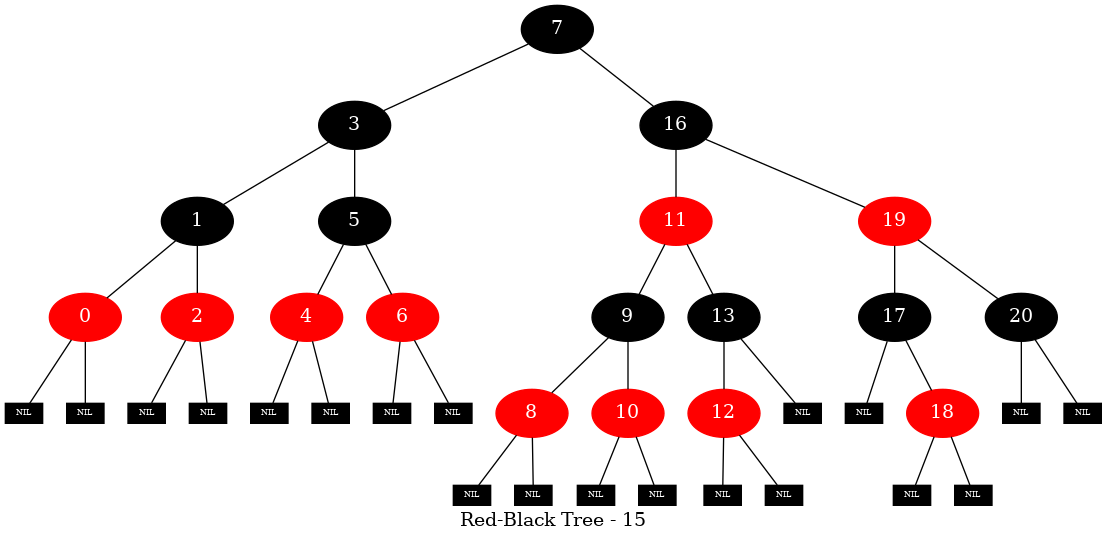

In [4]:
value = 15
rbt.delete(value)
graph_red_black_tree(rbt, 'dot3.txt', "Red-Black Tree - #{value}")
system "dot -Tpng -o dot3.png dot3.txt"
File.open('dot3.png')